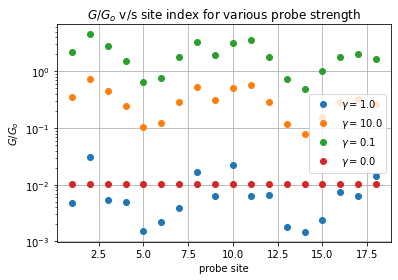

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math,cmath
from scipy.sparse import diags
#Creating the spectral density matrix
n=20;#laatice sites
no=np.linspace(1,n-2,n-2).astype('int');#bath lattice point
b = (1+math.sqrt(5))/2
sitegammaindx = [0, n-1]
sitegammastrn = [1.0, 1.0, 1.0]
sitegammastrnlow = [1.0, 1.0, 5.0]
sitegammastrnhigh = [1.0,1.0,10.0]
sitegammastrn0 = [1.0, 1.0, 0.0]
to = 3.0;#bath tunneling potential
t = 1.0;#system hopping
lamba = 0.5
alpha = 0.0
sitepotential = 1.0;#bath site potential(constant)
sitepotentialAAH = np.zeros(n)
temp = np.zeros(n)
for i in range (0,n-1):
    temp[i] = i
    sitepotentialAAH[i] = 2*lamba*math.cos(2*math.pi*b*(i+1))/(1+alpha*math.cos(2*math.pi*b*(i+1)))
epsilonbath = np.arange(-10,10,0.001);#empty list for fermi enrgy
ni = len(epsilonbath)
def selfenergy(gamma,energy):
    mat = (gamma**2*(energy - np.sqrt(4*to**2-energy**2)*1j))/2*to**2
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat[site,site] = -2*selfenergy(gamma,energy).imag
    return mat
#Green's functions
def ret_gre(energy,site):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(2):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn[i],energy))/t
    mat[site,site] = (energy - site - selfenergy(1.0,energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            if i != site:
                mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_gre0(energy):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(2):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrn0[i],energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grelow(energy,site):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(2):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnlow[i],energy))/t
    mat[site,site] = (energy - site - selfenergy(1.0,energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            if i != site:
                mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def ret_grehigh(energy,site):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(2):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(sitegammastrnhigh[i],energy))/t
    mat[site,site] = (energy - site - selfenergy(1.0,energy))/t
    for i in range(n):
        if i not in sitegammaindx:
            if i != site:
                mat[i,i] = (energy - sitepotentialAAH[i])/t
    return (np.linalg.inv(mat)/t)
def adv_gre(energy,site):
    return np.transpose(np.conjugate(ret_gre(energy,site)))
def adv_gre0(energy):
    return np.transpose(np.conjugate(ret_gre0(energy)))
def adv_grelow(energy,site):
    return np.transpose(np.conjugate(ret_grelow(energy,site)))
def adv_grehigh(energy,site):
    return np.transpose(np.conjugate(ret_grehigh(energy,site)))
#transmission probability
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy,site):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy,site)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy,site)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmission0(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre0(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre0(energy)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionlow(sgindx1,sgstrn1,sgindx2,sgstrn2,energy,site):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grelow(energy,site)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grelow(energy,site)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
def trnasmissionhigh(sgindx1,sgstrn1,sgindx2,sgstrn2,energy,site):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_grehigh(energy,site)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_grehigh(energy,site)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
free_energy = np.linspace(start=-2*to,stop=2*to,endpoint=True,num=n-2)
mat = np.zeros(len(free_energy), dtype = float)
matlow = np.zeros(len(free_energy), dtype = float)
mathigh = np.zeros(len(free_energy), dtype = float)
phi = np.zeros(len(free_energy), dtype = float)
for i in no:
    fe = 0
    rl0 = trnasmission0(sitegammaindx[1],sitegammastrn0[1],sitegammaindx[0],sitegammastrn[0],fe).real
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe,i).real
    rlhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],sitegammaindx[0],sitegammastrnhigh[0],fe,i).real
    rllow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],sitegammaindx[0],sitegammastrnlow[0],fe,i).real
    nr = trnasmission(no[i-1],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe,i).real
    nrhigh = trnasmissionhigh(no[i-1],sitegammastrnhigh[2],sitegammaindx[1],sitegammastrnhigh[1],fe,i).real
    nrlow =  trnasmissionlow(no[i-1],sitegammastrnlow[2],sitegammaindx[1],sitegammastrnlow[1],fe,i).real
    nl = trnasmission(no[i-1],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe,i).real 
    nlhigh = trnasmissionhigh(no[i-1],sitegammastrnhigh[2],sitegammaindx[0],sitegammastrnhigh[0],fe,i).real
    nllow = trnasmissionlow(no[i-1],sitegammastrnlow[2],sitegammaindx[0],sitegammastrnlow[0],fe,i).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],no[i-1],sitegammastrn[2],fe,i).real
    rnhigh = trnasmissionhigh(sitegammaindx[1],sitegammastrnhigh[1],no[i-1],sitegammastrnhigh[2],fe,i).real
    rnlow = trnasmissionlow(sitegammaindx[1],sitegammastrnlow[1],no[i-1],sitegammastrnlow[2],fe,i).real
    mat[i-1] = (rl+(rn*nl)/(nr+nl))
    matlow[i-1] = (rllow+(rnlow*nllow)/(nrlow+nllow))
    mathigh[i-1] = (rlhigh+(rnhigh*nlhigh)/(nrhigh+nlhigh))
    phi[i-1] = rl0
plt.plot(no, mat,'o',label =  '$\gamma = 1.0$')
plt.plot(no, mathigh,'o',label = '$\gamma = 10.0$')
plt.plot(no, matlow,'o',label = '$\gamma = 0.1$')
plt.plot(no, phi,'o',label = '$\gamma = 0.0$')
plt.title('$G/G_o$ v/s site index for various probe strength')
plt.xlabel('probe site')
plt.ylabel('$G/G_o$')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()


[[-0.73736888+0.j  1.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 1.        +0.j  0.08742572+0.j  1.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  1.        +0.j  0.60843886+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.0169373 +0.j
   1.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  1.        +0.j
  -0.68788243+0.j  1.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   1.        +0.j  0.9975089 +0.j]]
[-2.14388129 -2.14321407 -2.14210245 -2.14054705 -2.13854873 -2.13610859
 -2.13322901 -2.12990901 -2.12615257 -2.12195974 -2.11728193 -2.11231058
 -2.1068328  -2.10094079 -2.06506441 -2.05685801 -2.04822427 -2.09463886
 -2.07457701 -2.03923049 -1.97773921 -1.98294532 -1.99125316 -2.00074322
 -2.01055147 -2.02991508 -2.08089691 -1.74572236 -1.75241155 -1.76214356

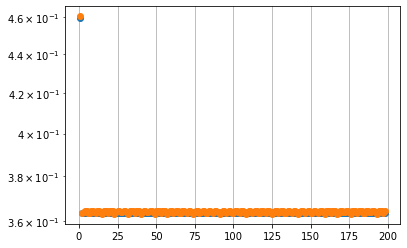

In [20]:
#AAH extended
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
#Creating the spectral density matrix
n=200;#laatice sites
no=np.linspace(1,n-2,n-2).astype('int');#bath lattice point
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1]
sitegammastrn0 = [1.0,1.0,0.0]
sitegammastrn0_1 = [1.0,1.0,0.1]
sitegamaastrn0_5 = [1.0,1.0,0.5]
sitegammastrn1_0 = [1.0, 1.0, 1.0]
sitegamaastrn2_0 = [1.0,1.0,2.0]
sitegamaastrn5_0 = [1.0,1.0,5.0]
sitegamaastrn10_0 = [1.0,1.0,10.0]
arrayofsitegamstrn = [sitegammastrn0, sitegammastrn0_1] #sitegamaastrn0_5, sitegammastrn1_0,sitegamaastrn2_0,sitegamaastrn5_0,sitegamaastrn10_0]
to = 3.0 #bath tunneling potential
t = 1.0 #system hopping
lamba = 0.5
alpha = 0.0
#sitepotential = 0.0;#bath site potential(constant)
siteindx = np.array(range(1, n))
sitepotentialAAH = 2*lamba*np.cos(2*np.pi*b*(siteindx))/(1+alpha*np.cos(2*np.pi*b*(siteindx)))
diagonals = [sitepotentialAAH,t*np.ones(n-1), t*np.ones(n-1)]
offset = [0,-1,1]
sys_Ham = diags(diagonals,offset,dtype='complex_').toarray()
print(sys_Ham)
eigvals, eigvecs = la.eig(sys_Ham)
energyval = (eigvals.real)
print(energyval)
def Rand(start, end, num):
    res = []
 
    for j in range(num):
        res.append(random.uniform(start, end))
 
    return res
def rnger(number,epsion):
    mat = []
    mat.append(number + epsion)
    mat.append(number - epsion)
    return mat
def makeeigran(eigvals, epsion, number):
    temp = []
    mat = []
    for i in range(len(eigvals)):
        temp.append(Rand(rnger(eigvals[i],epsion)[0],rnger(eigvals[i],epsion)[1],number))
    for k in range(len(eigvals)):
        for l in range(number):
            mat.append(temp[k][l])
    
    return mat
def makelist(pointer):
    moin = []
    for i in range(len(pointer)):
        moin.append(pointer[i])
    return moin
def selfenergy(gamma,energy):
    mat = ((gamma**2)/(2*to**2))*(energy - np.sqrt(4*to**2-energy**2)*1j)
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = -2*(selfenergy(gamma,energy).imag)
    return mat
#Green's functions
def ret_gre(energy, arraysitgamstrn,probsitindx):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotentialAAH[i]) / t
    for i in range(2):        
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(arraysitgamstrn[i],energy))/t
    mat[probsitindx,probsitindx] = (energy - sitepotentialAAH[probsitindx] - selfenergy(arraysitgamstrn[2],energy))/t
    return (np.linalg.det(mat)/t)

#transmission probability
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy, arraysitegamstrn,probsitindx):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy, arraysitegamstrn,probsitindx)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    mat = (spcdn1*spcdn2)/((retgre)**2)
    return abs(mat)
for sgstrn in arrayofsitegamstrn:
    print(sgstrn)
    mat = np.zeros(len(no), dtype = float)
    for i in range(0,len(no)):
        print(i)
        fe = 0.0
        rl = trnasmission(sitegammaindx[1],sgstrn[1],sitegammaindx[0],sgstrn[0],fe, sgstrn,i).real
        nr = trnasmission(i,sgstrn[2],sitegammaindx[1],sgstrn[1],fe, sgstrn,i).real
        nl = trnasmission(i,sgstrn[2],sitegammaindx[0],sgstrn[0],fe, sgstrn,i).real
        rn = trnasmission(sitegammaindx[1],sgstrn[1],i,sgstrn[2],fe, sgstrn,i).real
        if nr + nl == 0:
            mat[i] = rl
        else:
            mat[i] = (rl+(rn*nl)/(nr+nl))
    plot = [m if m>1.0E-18 else 1.0E-18 for m in mat]
    plt.plot(no,plot,'o')
plt.grid()
plt.yscale('log')
plt.show()





[1.0, 1.0, 0.01]
0.5740527180273555
[0.5740814206632568]
[1.0, 1.0, 0.010974987654930561]
0.5740442561734314
[0.5740814206632568, 0.5740788280903727]
[1.0, 1.0, 0.012045035402587823]
0.5740340640448557
[0.5740814206632568, 0.5740788280903727, 0.5740757053018534]
[1.0, 1.0, 0.013219411484660288]
0.5740217878864959
[0.5740814206632568, 0.5740788280903727, 0.5740757053018534, 0.5740719438553237]
[1.0, 1.0, 0.014508287784959394]
0.5740070016405824
[0.5740814206632568, 0.5740788280903727, 0.5740757053018534, 0.5740719438553237, 0.574067413126419]
[1.0, 1.0, 0.015922827933410922]
0.5739891921792972
[0.5740814206632568, 0.5740788280903727, 0.5740757053018534, 0.5740719438553237, 0.574067413126419, 0.5740619557701859]
[1.0, 1.0, 0.01747528400007684]
0.5739677415257964
[0.5740814206632568, 0.5740788280903727, 0.5740757053018534, 0.5740719438553237, 0.574067413126419, 0.5740619557701859, 0.574055382253264]
[1.0, 1.0, 0.019179102616724886]
0.5739419054516235
[0.5740814206632568, 0.574078828090372

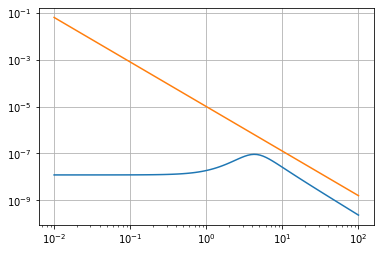

In [60]:
#AAH extended
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
#Creating the spectral density matrix
n=200;#laatice sites
no=100;#bath lattice point
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1,no-1]
gammastrn = np.logspace(-2,2,100)
arrayofsitegamstrn = []
for i in gammastrn:
    sitegammastrn = [1.0,1.0,i]
    arrayofsitegamstrn += [sitegammastrn]
to = 3.0 #bath tunneling potential
t = 1.0 #system hopping
lamba = 0.5
alpha = 0.0
#sitepotential = 0.0;#bath site potential(constant)
siteindx = np.array(range(1, n))
sitepotentialAAH = 2*lamba*np.cos(2*np.pi*b*(siteindx))/(1+alpha*np.cos(2*np.pi*b*(siteindx)))
def selfenergy(gamma,energy):
    mat = ((gamma**2)/(2*to**2))*(energy - np.sqrt(4*to**2-energy**2)*1j)
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = -2*(selfenergy(gamma,energy).imag)
    return mat
#Green's functions
def ret_gre(energy, arraysitgamstrn):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotentialAAH[i]) / t
    for i in range(3):        
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(arraysitgamstrn[i],energy))/t
    return (np.linalg.det(mat)/t)

#transmission probability
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy, arraysitegamstrn):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy, arraysitegamstrn)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    mat = (spcdn1*spcdn2)/((retgre)**2)
    return abs(mat)
mat = []
for sgstrn in arrayofsitegamstrn:
    print(sgstrn)
    fe = 0.0
    rl = trnasmission(sitegammaindx[1],sgstrn[1],sitegammaindx[0],sgstrn[0],fe, sgstrn).real
    nr = trnasmission(sitegammaindx[2],sgstrn[2],sitegammaindx[1],sgstrn[1],fe, sgstrn).real
    nl = trnasmission(sitegammaindx[2],sgstrn[2],sitegammaindx[0],sgstrn[0],fe, sgstrn).real
    rn = trnasmission(sitegammaindx[1],sgstrn[1],sitegammaindx[2],sgstrn[2],fe, sgstrn).real
    print(rl)
    if nr + nl == 0:
        mat += [rl]
    else:
        mat += [(rl+((rn*nl)/(nr+nl)))]
    print(mat)
plot = [m if m>1.0E-18 else 1.0E-18 for m in mat]
#plt.plot(gammastrn,plot)
mat=[]
for sgstrn in arrayofsitegamstrn:
    print(sgstrn)
    fe = -1.70
    rl = trnasmission(sitegammaindx[1],sgstrn[1],sitegammaindx[0],sgstrn[0],fe, sgstrn).real
    nr = trnasmission(sitegammaindx[2],sgstrn[2],sitegammaindx[1],sgstrn[1],fe, sgstrn).real
    nl = trnasmission(sitegammaindx[2],sgstrn[2],sitegammaindx[0],sgstrn[0],fe, sgstrn).real
    rn = trnasmission(sitegammaindx[1],sgstrn[1],sitegammaindx[2],sgstrn[2],fe, sgstrn).real
    print(rl)
    if nr + nl == 0:
        mat += [rl]
    else:
        mat += [(rl+((rn*nl)/(nr+nl)))]
    print(mat)
plot = [m if m>1.0E-18 else 1.0E-18 for m in mat]
plt.plot(gammastrn,plot)
plt.plot(gammastrn,gammastrn**(-1.9)/(1.0E+5))
#np.savetxt('conductivity v/s '.plot)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.show()





In [33]:
#AAH extended
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
#Creating the spectral density matrix
n=200;#laatice sites
no=100;#bath lattice point
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1,no-1]
gammastrn = np.logspace(-2,2,100)
print(gammastrn)

[1.00000000e-02 1.09749877e-02 1.20450354e-02 1.32194115e-02
 1.45082878e-02 1.59228279e-02 1.74752840e-02 1.91791026e-02
 2.10490414e-02 2.31012970e-02 2.53536449e-02 2.78255940e-02
 3.05385551e-02 3.35160265e-02 3.67837977e-02 4.03701726e-02
 4.43062146e-02 4.86260158e-02 5.33669923e-02 5.85702082e-02
 6.42807312e-02 7.05480231e-02 7.74263683e-02 8.49753436e-02
 9.32603347e-02 1.02353102e-01 1.12332403e-01 1.23284674e-01
 1.35304777e-01 1.48496826e-01 1.62975083e-01 1.78864953e-01
 1.96304065e-01 2.15443469e-01 2.36448941e-01 2.59502421e-01
 2.84803587e-01 3.12571585e-01 3.43046929e-01 3.76493581e-01
 4.13201240e-01 4.53487851e-01 4.97702356e-01 5.46227722e-01
 5.99484250e-01 6.57933225e-01 7.22080902e-01 7.92482898e-01
 8.69749003e-01 9.54548457e-01 1.04761575e+00 1.14975700e+00
 1.26185688e+00 1.38488637e+00 1.51991108e+00 1.66810054e+00
 1.83073828e+00 2.00923300e+00 2.20513074e+00 2.42012826e+00
 2.65608778e+00 2.91505306e+00 3.19926714e+00 3.51119173e+00
 3.85352859e+00 4.229242